# 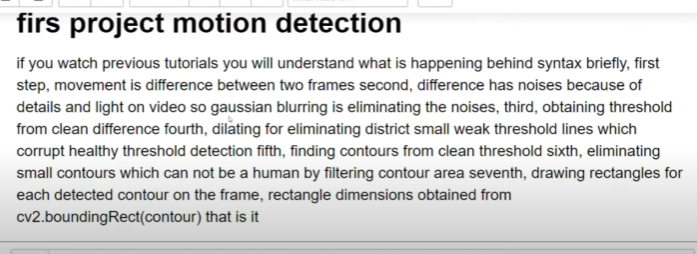
the above image, shows the steps for the project

In [4]:
#important to review the video 

import cv2
import numpy as np

cap = cv2.VideoCapture("Data/vtest.avi.mp4")

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc('X','V','I','D') #use this always, used to enhance resolution, qualtiy ...
out = cv2.VideoWriter("output.avi", fourcc, 30, (1280,720)) #used to save the new video file in your device
                    #=(video name, fourcc, video frame, (frame width, frame heigh))
ret, frame1 = cap.read()
ret, frame2 = cap.read()


while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray, (5,5), 0) #to remove noise when person is moving
    
    _,thresh = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations = 10)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    draw = cv2.drawContours(frame1,contours, -1, (0,255,0), 2)
    
    for contour in contours: #used to find dimenstions of rectangle around each person or around each object in the video
        (x,y,w,h) = cv2.boundingRect(contour) #Only find dimentions
        
        if cv2.contourArea(contour) < 900:
            continue
        cv2.rectangle(frame1, (x,y), (x+w, y+h), (0,255,0), 2) #draw the dimentions
        cv2.putText(frame1, "Status:{}".format("Movement"), (10,20), 
                   cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        
    image = cv2.resize(frame1, (1280, 720))
    out.write(image)
    cv2.imshow("Motion Detection", frame1)
    cv2.imshow("Thresh", thresh)
    cv2.imshow("Dilation", dilated)
    
    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(60) == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
out.release()